<a href="https://colab.research.google.com/github/Dhedeepya-09/Fake-news-detection/blob/main/Fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/lutzhamel/fake-news/master/data/fake_or_real_news.csv"
df = pd.read_csv(url)

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (6335, 4)


,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
X = df['text']
y = df['label']   # FAKE or REAL

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(max_iter=50)

Accuracy: 93.37 %

Classification Report:

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93       628
        REAL       0.94      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



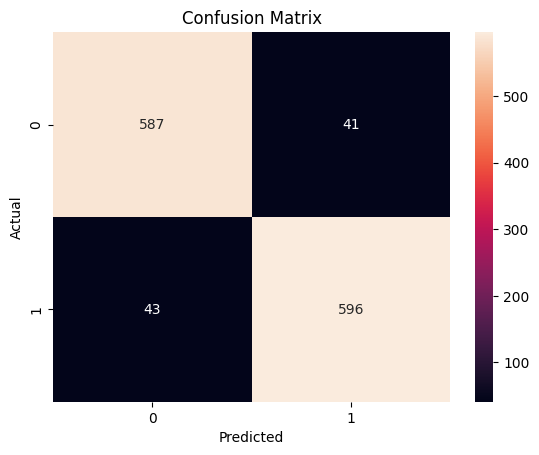

In [ ]:
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
def predict_news(news):
    vector = tfidf.transform([news])
    prediction = model.predict(vector)
    print("\nNews:", news)
    print("Prediction:", prediction[0])

predict_news("NASA announces new discovery on Mars")
predict_news("Shocking miracle cure makes people immortal overnight")


News: NASA announces new discovery on Mars
Prediction: FAKE

News: Shocking miracle cure makes people immortal overnight
Prediction: FAKE
